In [175]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from collections import Counter


In [176]:
df = pd.read_csv("SpotifyLarge.csv")
# ensure track_name is a string type
df["track_name"] = df["track_name"].astype(str)
# ensure album_name is a string type
df["album_name"] = df["album_name"].astype(str)
df.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## Loudness vs song popularity

    loudness_round  popularity
0            -50.0   32.000000
1            -49.0   37.000000
2            -47.0   34.000000
3            -46.0   54.000000
4            -44.0   39.500000
5            -43.0   37.090909
6            -42.0   23.200000
7            -41.0   25.000000
8            -40.0   35.153846
9            -39.0   37.000000
10           -38.0   37.156250
11           -37.0   50.027027
12           -36.0   40.640000
13           -35.0   37.101695
14           -34.0   44.603448
15           -33.0   39.021978
16           -32.0   35.584746
17           -31.0   35.054795
18           -30.0   33.506410
19           -29.0   34.297753
20           -28.0   34.022831
21           -27.0   29.855469
22           -26.0   29.588235
23           -25.0   30.111455
24           -24.0   26.913408
25           -23.0   24.113744
26           -22.0   23.814196
27           -21.0   24.077338
28           -20.0   24.127479
29           -19.0   26.316129
30           -18.0   27.912139
31      

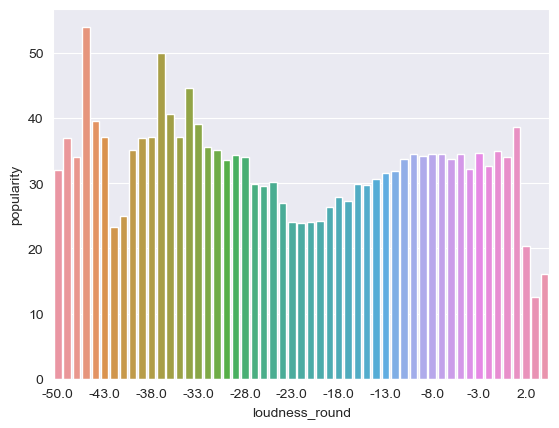

In [177]:
# compare energy vs loudness
# group loudness column by 1
df['loudness_round'] = df['loudness'].round(0)
modified_df = df.groupby("loudness_round")['popularity'].mean().reset_index()
print(modified_df)
fig, ax = plt.subplots()
sns.barplot(x="loudness_round", y="popularity", data=modified_df, ax=ax)
# modify x axis to reduce ticks
ax.set_xticks(ax.get_xticks()[::5])
plt.show()

## Compare song duration vs song popularity

    duration_round  popularity
0            20000    0.666667
1            30000   22.909091
2            40000   22.672727
3            50000   21.179012
4            60000   24.027237
..             ...         ...
79          860000   40.285714
80          880000   19.285714
81          900000   27.285714
82          950000   23.000000
83          980000   42.857143

[84 rows x 2 columns]


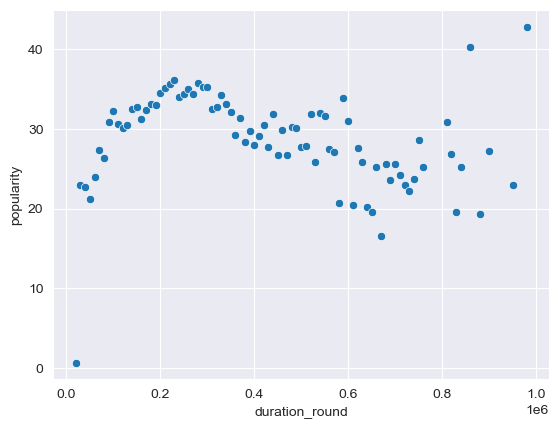

In [178]:
# group song duration by 1000
df['duration_round'] = df['duration_ms'].round(-4)
# remove outliers where there are less than 5 songs of a duration_round
modified_df = df.groupby("duration_round").filter(lambda x: len(x) > 5)
modified_df = modified_df.groupby("duration_round")['popularity'].mean().reset_index()
print(modified_df)
sns.scatterplot(x="duration_round", y="popularity", data=modified_df)
# only plot values between 0 and 1e6
plt.show()  

## NLP Analysis


### Compare number of words in a song title vs song popularity

0          6
1         16
2         14
3         26
4          7
          ..
113995    19
113996    16
113997    14
113998     7
113999     9
Name: title_length, Length: 114000, dtype: int64


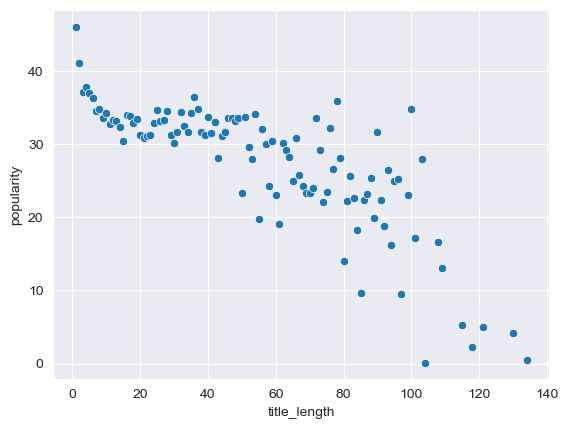

In [179]:
# find word length of song title
df["title_length"] = df["track_name"].apply(lambda x: len(x))
print(df["title_length"])
# remove outliers where there are less than 5 songs of a title_length
modified_df = df.groupby("title_length").filter(lambda x: len(x) > 5)
# group by word length and find average streams
modified_df = modified_df.groupby("title_length")['popularity'].mean().reset_index()
# plot word length vs streams
sns.scatterplot(x="title_length", y="popularity", data=modified_df)
plt.show()

Vivo - live in spanish

[('vivo', 2880), ('remix', 2646), ('ao', 2639), ('love', 2341), ('christmas', 1842), ('la', 1504), ('mix', 1493), ('version', 1346), ('live', 1328), ('remastered', 1195), ('edit', 1000), ("don't", 815), ('que', 776), ('original', 768), ('en', 754), ('like', 749), ('radio', 748), ('time', 742), ('song', 722), ('amor', 722), ('little', 708), ('te', 686), ('let', 663), ('life', 580), ('night', 575), ('remaster', 535), ('good', 516), ('heart', 497), ('da', 488), ("i'm", 475), ('run', 470), ('e', 470), ('no.', 470), ('eu', 466), ('world', 464), ("it's", 456), ('na', 450), ('baby', 447), ('se', 447), ('day', 444), ('home', 422), ('way', 415), ('não', 408), ('man', 399), ('mi', 397), ('tu', 396), ('feel', 395), ('2', 395), ('single', 385), ('come', 382)]


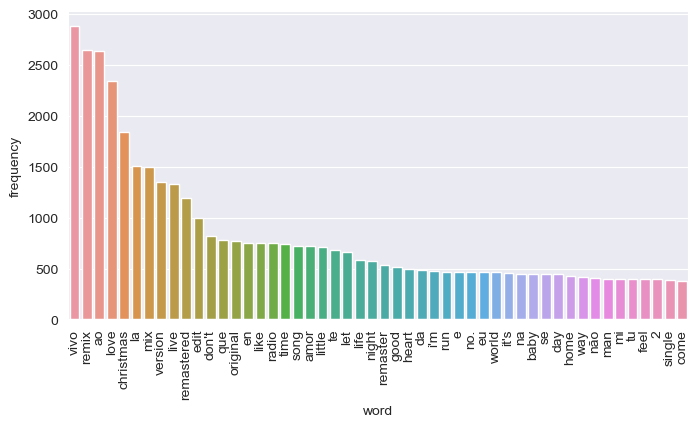

In [180]:
# find most common words in song titles
# convert all song titles to lowercase
df["track_name"] = df["track_name"].str.lower()
# create a list of all the words in the song titles
words = []
for title in df["track_name"]:
    words.extend(title.split())
    # count the number of times each word appears
word_count = Counter(words)
# remove stopwords
for word in list(word_count):
    if word in ENGLISH_STOP_WORDS:
        del word_count[word]
# remove additional words that are not useful
words_to_filter = ["-", "/", "o", "el", "&"]
for word in words_to_filter:
    del word_count[word]
# remove words that contain "(" or ")" as they are just words like (feat., (live, (with, etc. that contain no useful information
for word in list(word_count):
    if "(" in word or ")" in word:
        del word_count[word]
print(word_count.most_common(50))
# plot word frequency
word_count_df = pd.DataFrame(word_count.most_common(50), columns=["word", "frequency"])
dims = (8, 4)
fig, ax = plt.subplots(figsize=dims)
sns.barplot(x="word", y="frequency", data=word_count_df, ax=ax)
# make x axis labels vertical 
plt.xticks(rotation=90)
# increase spacing between x axis labels
plt.show()

[('2022', 3281), ('christmas', 3140), ('vol.', 3048), ('hits', 2365), ('best', 1928), ('motion', 1893), ('picture', 1808), ('2', 1718), ('halloween', 1675), ('love', 1453), ('rock', 1405), ('pop', 1393), ('la', 1388), ('1', 1379), ('music', 1343), ('songs', 1235), ('perreo', 1211), ('party', 1093), ('vivo', 1073), ('en', 877), ('new', 823), ('ao', 807), ('para', 758), ('3', 747), ('classics', 676), ('del', 651), ('country', 650), ('los', 636), ('ep', 631), ('night', 625), ('y', 622), ('time', 565), ('live', 547), ('piano', 538), ('good', 518), ('original', 518), ('e', 512), ('4', 511), ('collection', 509), ('world', 485), ('tunes', 479), ('anniversary', 464), ('dance', 463), ('life', 462), ("it's", 451), ('kids', 442), ('greatest', 438), ('pov:', 432), ('metal', 431), ('day', 418)]


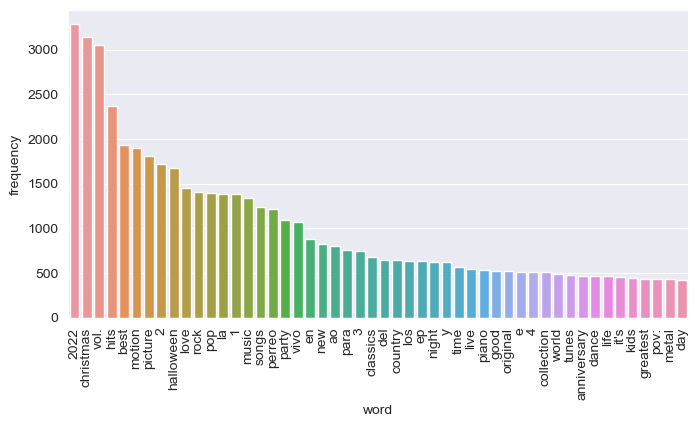

In [181]:
# same but for albums
df["album_name"] = df["album_name"].str.lower()
words = []
for title in df["album_name"]:
    words.extend(title.split())
word_count = Counter(words)
# remove stopwords
for word in list(word_count):
    if word in ENGLISH_STOP_WORDS:
        del word_count[word]
# remove additional words that are not useful
words_to_filter = ["(feat.", "-", "/", "o", "el", "&"]
for word in words_to_filter:
    del word_count[word]
# remove words that contain "(" or ")" as they are just words like (feat., (live, (with, etc. that contain no useful information
for word in list(word_count):
    if "(" in word or ")" in word:
        del word_count[word]
print(word_count.most_common(50))
# plot word frequency
word_count_df = pd.DataFrame(word_count.most_common(50), columns=["word", "frequency"])
dims = (8, 4)
fig, ax = plt.subplots(figsize=dims)
sns.barplot(x="word", y="frequency", data=word_count_df, ax=ax)
# make x axis labels vertical 
plt.xticks(rotation=90)
# increase spacing between x axis labels
plt.show()